Challenge Description

We got employee data from a few companies. We have data about all employees who joined from 2011/01/24 to 2015/12/13. For each employee, we also know if they are still at the company as of 2015/12/13 or they have quit. Beside that, we have general info about the employee, such as avg salary during her tenure, dept, and yrs of experience.

As said above, the goal is to predict employee retention and understand its main drivers. Specifically, you should:


Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id


What are the main factors that drive employee churn? Do they make sense? Explain your findings


If you could add to this data set just one variable that could help explain employee churn, what would that be?

In [18]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 350)
  
#read from google drive
data=pd.read_csv("https://drive.google.com/uc?export=download&id=10cwdWd4axXdQX-53FBecxRo1bcXcQVP4")
  
print(data.head())

   employee_id  company_id              dept  seniority    salary   join_date   quit_date
0      13021.0           7  customer_service         28   89000.0  2014-03-24  2015-10-30
1     825355.0           7         marketing         20  183000.0  2013-04-29  2014-04-04
2     927315.0           4         marketing         14  101000.0  2014-10-13         NaN
3     662910.0           7  customer_service         20  115000.0  2012-05-14  2013-06-07
4     256971.0           2      data_science         23  276000.0  2011-10-17  2014-08-22


In [19]:
data.dtypes

employee_id    float64
company_id       int64
dept            object
seniority        int64
salary         float64
join_date       object
quit_date       object
dtype: object

In [29]:
print(data['dept'].unique())
print(data['company_id'].unique())


['customer_service' 'marketing' 'data_science' 'engineer' 'sales' 'design']
[ 7  4  2  9  1  6 10  5  3  8 11 12]


In [28]:
#checking missing
data.isnull().sum()

employee_id        0
company_id         0
dept               0
seniority          0
salary             0
join_date          0
quit_date      11192
dtype: int64

In [26]:
import seaborn as sns


<Figure size 4320x2160 with 0 Axes>

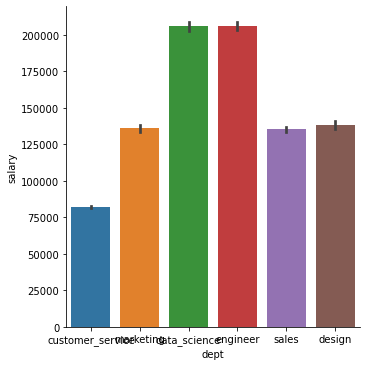

In [189]:
plt.figure(figsize = (60,30))
sns.catplot(data=data, kind="bar", x="dept", y="salary")

#make it 45 degree
#turn to horiztiontal 


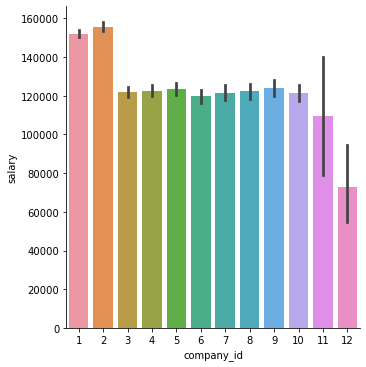

In [31]:
sns.catplot(data=data, kind="bar", x="company_id", y="salary")


In [38]:
corelation=data.corr()

<AxesSubplot:>

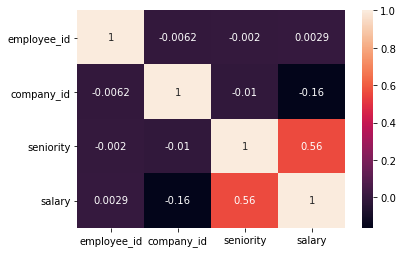

In [42]:
sns.heatmap(corelation,xticklabels =corelation.columns, yticklabels=corelation.columns, annot=True)

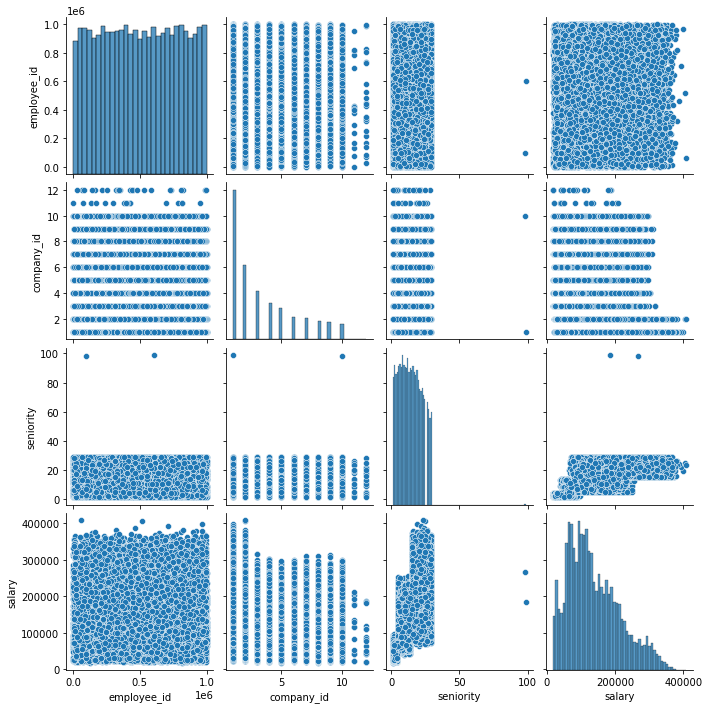

In [43]:
sns.pairplot(data)

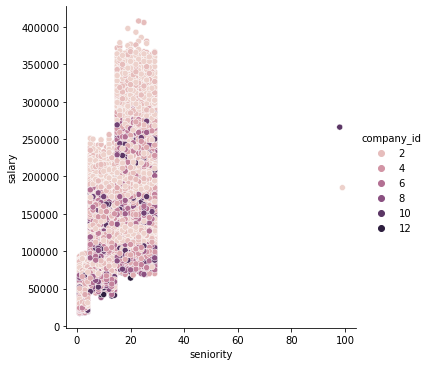

In [48]:
sns.relplot(data=data, x='seniority',y='salary',hue='company_id')

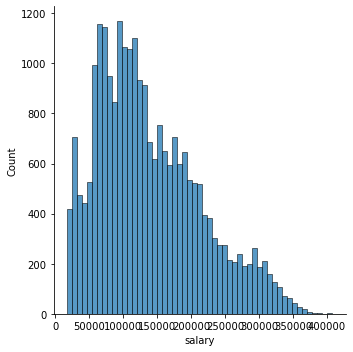

In [54]:
sns.displot(data['salary'])

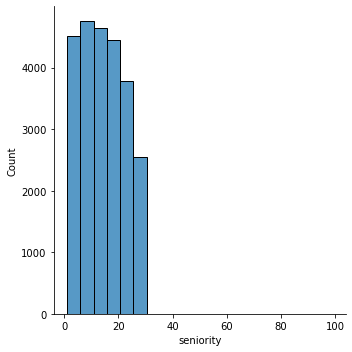

In [52]:
sns.displot(data['seniority'],bins=0)

In [57]:
from datetime import datetime

data['join_date'] =pd.to_datetime(data['join_date'])

In [58]:
data['quit_date']=pd.to_datetime(data['quit_date'])

In [59]:
data.describe(include='all')

<ipython-input-59-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')
<ipython-input-59-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,employee_id,company_id,dept,seniority,salary,join_date,quit_date
count,24702.000000,24702.000000,24702,24702.000000,24702.000000,24702,13510
unique,NaN,NaN,6,NaN,NaN,995,664
top,NaN,NaN,customer_service,NaN,NaN,2012-01-03 00:00:00,2015-05-08 00:00:00
freq,NaN,NaN,9180,NaN,NaN,105,111
first,NaN,NaN,NaN,NaN,NaN,2011-01-24 00:00:00,2011-10-13 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2015-12-10 00:00:00,2015-12-09 00:00:00
mean,501604.403530,3.426969,NaN,14.127803,138183.345478,NaN,NaN
std,288909.026101,2.700011,NaN,8.089520,76058.184573,NaN,NaN
min,36.000000,1.000000,NaN,1.000000,17000.000000,NaN,NaN
25%,250133.750000,1.000000,NaN,7.000000,79000.000000,NaN,NaN


In [140]:
data['quit_date'].fillna('2015-12-31',inplace=True)
data['quit_date']=pd.to_datetime(data['quit_date'])

<ipython-input-140-5e6c74b7bcbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quit_date']=pd.to_datetime(data['quit_date'])


In [141]:
data['employment_length']=(data['quit_date'] - data['join_date']).astype('timedelta64[D]')

<ipython-input-141-7c77e2e0c7e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['employment_length']=(data['quit_date'] - data['join_date']).astype('timedelta64[D]')


In [142]:
data['employment_length'].describe

<bound method NDFrame.describe of 0         585.0
1         340.0
2         444.0
3         389.0
4        1040.0
          ...  
24695    1151.0
24696     372.0
24699     780.0
24700    1123.0
24701     864.0
Name: employment_length, Length: 19270, dtype: float64>

In [64]:
import matplotlib.pyplot as plt


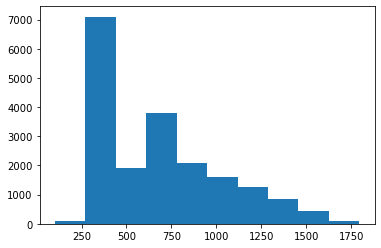

In [143]:
plt.hist(data['employment_length'].dropna())
plt.show()

First Question Solution

Assume, for each company, that the headcount starts from zero on 2011/01/23. Estimate employee headcount, for each company on each day, from 2011/01/24 to 2015/12/13. That is, if by 2012/03/02 2000 people have joined company 1 and 1000 of them have already quit, then company headcount on 2012/03/02 for company 1 would be 1000. You should create a table with 3 columns: day, employee_headcount, company_id




In [11]:
uniqe_date=pd.date_range(start='2011/01/24', end='2015/12/13')

In [12]:
uniqe_date

DatetimeIndex(['2011-01-24', '2011-01-25', '2011-01-26', '2011-01-27', '2011-01-28', '2011-01-29', '2011-01-30', '2011-01-31', '2011-02-01', '2011-02-02',
               ...
               '2015-12-04', '2015-12-05', '2015-12-06', '2015-12-07', '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11', '2015-12-12', '2015-12-13'], dtype='datetime64[ns]', length=1785, freq='D')

In [13]:
unique_companies=data['company_id'].unique()

In [102]:
df_headcount =pd.MultiIndex.from_product([uniqe_date, unique_companies], names=['date','company_id'])

In [103]:
df_headcount=pd.DataFrame(index=df_headcount).reset_index()

In [104]:

df_headcount.head()

,date,company_id
0,2011-01-24,7
1,2011-01-24,4
2,2011-01-24,2
3,2011-01-24,9
4,2011-01-24,1


In [69]:
data.groupby('company_id')['employee_id'].count()

company_id
1     8486
2     4222
3     2749
4     2062
5     1755
6     1291
7     1224
8     1047
9      961
10     865
11      16
12      24
Name: employee_id, dtype: int64

In [74]:
data.groupby('dept')['employee_id'].count()

dept
customer_service    9180
data_science        3190
design              1380
engineer            4613
marketing           3167
sales               3172
Name: employee_id, dtype: int64

In [144]:
data.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_length,early_quitter,salary_percentile
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30,585.0,0,14
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04,340.0,1,36
2,927315.0,4,marketing,14,101000.0,2014-10-13,2015-12-31,444.0,0,18
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07,389.0,1,22
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22,1040.0,0,46


In [145]:
nan_df=data[data.isna().any(axis=1)]
nan_df.head()

##fill NA with current date or end of 2015

,employee_id,company_id,dept,seniority,salary,join_date,quit_date,employment_length,early_quitter,salary_percentile


In [169]:
join_data=data.groupby(['join_date','company_id']).size().reset_index(name='join_cnt')

In [170]:
join_data.columns.values[0]='date'

In [182]:
join_data

,date,company_id,join_cnt
0,2011-01-24,1,25
1,2011-01-24,2,17
2,2011-01-24,3,9
3,2011-01-24,4,12
4,2011-01-24,5,5
...,...,...,...
3998,2014-11-11,2,1
3999,2014-11-11,4,1
4000,2014-11-11,5,1
4001,2014-11-11,7,2


In [149]:
quite_data=data.groupby(['quit_date','company_id']).size().reset_index(name='join_cnt')

,quit_date,company_id,quit_cnt
0,2011-10-13,6,1
1,2011-10-14,10,1
2,2011-10-21,1,1
3,2011-10-28,4,1
4,2011-11-11,1,1
...,...,...,...
2718,2015-12-31,8,249
2719,2015-12-31,9,221
2720,2015-12-31,10,189
2721,2015-12-31,11,4


In [160]:
quite_data.columns.values[0]='date'
print(quite_data.head())
print(join_data.head())

        date  company_id  quit_cnt
0 2011-10-13           6         1
1 2011-10-14          10         1
2 2011-10-21           1         1
3 2011-10-28           4         1
4 2011-11-11           1         1
        date  company_id  join_cnt
0 2011-01-24           1        25
1 2011-01-24           2        17
2 2011-01-24           3         9
3 2011-01-24           4        12
4 2011-01-24           5         5


In [161]:
import sqlite3


In [176]:
conn = sqlite3.connect(r'C:\Users\SQLite\Geeks.db')


In [177]:
cursor = conn.cursor()


In [183]:
sql =('''
select t1.*, t2.quit_cnt
from 
join_data t1
left join
quite_data t2
on 
t1.company_id=t2.compnay_id
and 
t1.date=t2.date
''')


In [184]:
conn.execute(sql)


OperationalError: no such table: join_data

In [ ]:
result = cursor.fetchall()
for row in result:
    print(row)

In [157]:
# merge quite data and join data

df_headcount1 = pd.merge(df_headcount, join_data, on=['date', 'company_id'], how='left')
print(df_headcount1.head())

        date  company_id  join_cnt_x  join_cnt_y  join_cnt
0 2011-01-24           7         1.0         1.0       1.0
1 2011-01-24           4        12.0        12.0      12.0
2 2011-01-24           2        17.0        17.0      17.0
3 2011-01-24           9         3.0         3.0       3.0
4 2011-01-24           1        25.0        25.0      25.0


In [156]:
df_headcount2 = pd.merge(df_headcount1, quite_data, on=['date', 'company_id'], how='left')


KeyError: 'date'

In [122]:
df_headcount2.head()

,date,company_id,join_cnt_x,join_cnt_y,join_cnt_x,join_cnt_y
0,2011-01-24,7,1.0,1.0,1.0,1.0
1,2011-01-24,4,12.0,12.0,12.0,12.0
2,2011-01-24,2,17.0,17.0,17.0,17.0
3,2011-01-24,9,3.0,3.0,3.0,3.0
4,2011-01-24,1,25.0,25.0,25.0,25.0


In [ ]:
df_headcount2.head()

#Decision tree

In [130]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

In [132]:
from datetime import timedelta
#Create binary class
data=data[data['join_date'] <datetime.strptime("2015/12/13", "%Y/%m/%d") - timedelta(days=(365+31))]
data['early_quitter'] = np.where((data['employment_length']>396) | (np.isnan(data['employment_length'])), 0, 1)

<ipython-input-132-41a0081ec811>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['early_quitter'] = np.where((data['employment_length']>396) | (np.isnan(data['employment_length'])), 0, 1)


In [133]:

data_dummy = pd.get_dummies(data[['company_id', 'dept', 'seniority', 'salary', 'early_quitter']], drop_first=True)           

In [134]:
tree = DecisionTreeClassifier( max_depth=4, min_samples_leaf = 30, class_weight="balanced", min_impurity_decrease = 0.001)
tree.fit(data_dummy.drop('early_quitter', axis=1), data['early_quitter'])

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_impurity_decrease=0.001, min_samples_leaf=30)

In [185]:
export_graphviz(tree, out_file="tree_employee.dot", feature_names=data_dummy.drop('early_quitter', axis=1).columns, proportion=True, rotate=True)
with open("tree_employee.dot") as f:
    dot_graph = f.read()
s = Source.from_file("tree_employee.dot")
s.view()

'tree_employee.dot.pdf'

<ipython-input-137-e3b4e94280ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['salary_percentile'] = pd.qcut(data['salary'],q=50, labels=False)


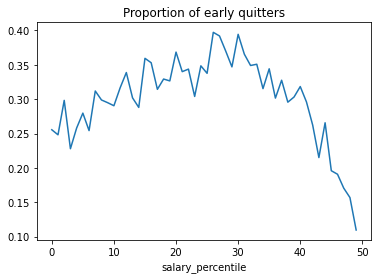

In [137]:
#convert salary to its percentiles. We break it into 50 bins.
data['salary_percentile'] = pd.qcut(data['salary'],q=50, labels=False)
#take proportion of early quitters for each percentile value and plot it
data.groupby('salary_percentile')['early_quitter'].mean().plot(title="Proportion of early quitters")
plt.show()

In [ ]:
## linear regression

